# Projet numérique : Choix du pas de temps


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

## Pas fixe 

On construira dans un premier temps un solver avec un pas de temps fixe avec le schéma d'Euler :

$$ x^{j+1} = x^j + dt \: f(t_j, x^j)$$

On fera plusieurs simulation en baissant petit à petit ce pas de temps jusqu'à ce que le pas de temps ne semble plus changer. Ce pas de temps correspond au pas de temps $\Delta t_{opt}$.

La fonction `solve_euler_explicit` prend en entrée une fonction $f$, une condition initiale $x_0$, un pas de temps $dt$ et un temps final $t_f$ et renvoie le vecteur des temps $t^j$ et la solution $x^j$ du schéma d'Euler explicite appliqué à $\stackrel{.}{x} \, = f(x)$. 

### Résolution de l'équation


In [2]:
def solve_euler_explicit(f, x0, dt, tf, t0 = 0.0):
    x = np.zeros(floor(abs(tf-t0)/dt))
    t = np.arange(floor(abs(tf-t0)/dt))*dt
    x[0] = x0
    for j in range(len(t)-1):
        x[j+1] = x[j] + dt*f(x[j])   
    return t, x

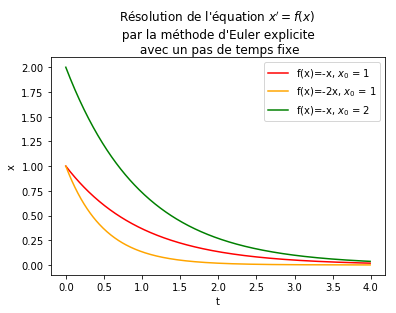

In [3]:
f = lambda x : -x
g = lambda x : -2*x

t, x = solve_euler_explicit(f, 1, 0.01, 4) 
plt.plot(t, x, label = 'f(x)=-x, $x_0$ = 1', color = 'red')
t, x = solve_euler_explicit(g, 1, 0.01, 4) 
plt.plot(t, x, label = 'f(x)=-2x, $x_0$ = 1', color = 'orange')
t, x = solve_euler_explicit(f, 2, 0.01, 4) 
plt.plot(t, x, label = 'f(x)=-x, $x_0$ = 2', color = 'green')
plt.title("Résolution de l'équation $x' = f(x)$ \n par la méthode d'Euler explicite \n avec un pas de temps fixe")
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.show()

### Erreur

La solution de l'équation différentielle $\stackrel{.}{x} = -a \times x$ avec $a$ constante et $x_0$ la condition initiale est $x(t) = x_0 \times e^{-at}$. On évalue l'erreur en calculant la différence entre la solution numérique donnée par la méthode d'Euler et la solution analytique.

C:\Users\camil\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


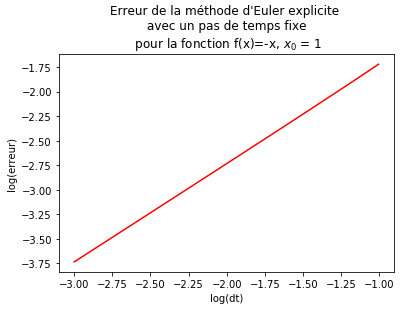

In [4]:
x0 = 1
erreur = []

for dt in np.arange(100)/1000:
    if dt != 0:
        t, x = solve_euler_explicit(f, x0, dt, 4) 
        erreur.append(np.max(np.abs(x0*np.exp(-t) - x)))

plt.plot(np.log10(np.arange(100)/1000)[1:], np.log10(erreur), 'r')
plt.title("Erreur de la méthode d'Euler explicite \n avec un pas de temps fixe \n pour la fonction f(x)=-x, $x_0$ = 1")
plt.xlabel('log(dt)')
plt.ylabel('log(erreur)')
plt.show()

On a bien une pente de coefficient directeur 1.

### Schéma d'ordre 2

On étudie la convergence du schéma de Heun : 

$$ x^{j+1} = x^j + \frac{dt}{2} \, (\, f(t_j,x^j) \, + \, f(t_{j+1}, \, x^j \, + \, dt \: f(t_j, x^j)))$$ 

In [5]:
def solve_heun(f, x0, dt, tf, t0 = 0.0):
    x = np.zeros(floor(abs(tf-t0)/dt))
    x_int = np.zeros(floor(abs(tf-t0)/dt))
    t = np.arange(floor(abs(tf-t0)/dt))*dt
    x[0] = x0
    x_int[0] =x0
    for j in range(len(t)-1):
        x_int[j+1] = x[j] + dt*f(x[j]) 
        x[j+1] = x[j] + dt/2*(f(x[j]) + f(x_int[j+1]))
    return t, x

C:\Users\camil\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


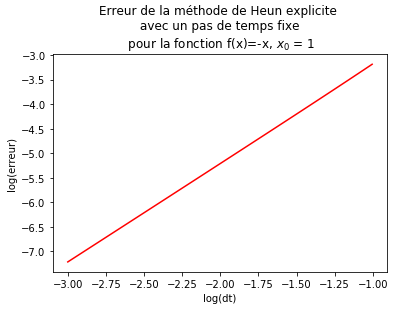

In [6]:
x0 = 1
erreur = []

for dt in np.arange(100)/1000:
    if dt != 0:
        t, x = solve_heun(f, x0, dt, 4) 
        if np.any(x0*np.exp(f(t)) - x) != 0 :
            erreur.append(np.log10(max(np.abs(x0*np.exp(f(t)) - x))))
        else :
            erreur.append(0)

plt.plot(np.log10(np.arange(100)/1000)[1:], erreur, 'r')
plt.title("Erreur de la méthode de Heun explicite \n avec un pas de temps fixe \n pour la fonction f(x)=-x, $x_0$ = 1")
plt.xlabel('log(dt)')
plt.ylabel('log(erreur)')
plt.show()

Le coefficient de la droite est cette fois de 2.

## Adaptation du pas de temps

**Montrons que si $f$ est $C^1$, on a pour un schéma d'Euler explicite :** $|| e^{j+1}|| = \Delta t_j \, \frac{|| \, f(t_{j+1},x^{j+1})-f(t_j,x^j)\,||}{2} + O(\Delta t_j^3)$

On suppose $f$ $C^1$. Par définition, $x^j$ est la solution de $\stackrel{.}{x} \, = f(x)$ initialisée à $t_j$, c'est à dire qu'on a :

\begin{cases}
\stackrel{.}{x} &= \, f(t, x(t)) \\
x(t_j) &= \, x^j
\end{cases}

Par définition, $e^{j+1} \, = \, x^j + \int^{t_{j+1}}_{t_j}f(s,x(s)) \, ds - x^{j+1}$.

Comme $f$ est $C^1$, alors la fonction $x$ sera $C^2$.

Donc en effectuant un développement de Taylor-Young à l'ordre 2, on obtient :

$$||e^{j+1}|| = ||x^j + \Delta t_j \,f(t_j,x^j) + \frac{\Delta t_j^2}{2} \, \stackrel{..}{x}(t_j) - x^{j+1}|| + O(\Delta t^3)$$

$$||e^{j+1}|| = ||x^j  - x^{j+1} + \frac{\Delta t_j}{2} \,f(t_j,x^j) + \frac{\Delta t_j}{2} \, [ \,f(t_j,x^j) +\Delta t_j \stackrel{..}{x}(t_j) \,] ||+ O(\Delta t^3)$$

Or, $f(t_{j+1},x^{j+1}) = f(t_{j+1}, \, x(t_j)+\Delta t_j \, f(t_j,x(t_j)) \,)$. 

Après un développement de Taylor-Young à l'ordre 1 on obtient :

$$f(t_{j+1},x^{j+1}) = f(t_j, \, x(t_j))+ \, \Delta t_j \, [\partial_t f(t_j,x(t_j)) + \partial_x f(t_j,x(t_j)) \,  \, f(t_j,x(t_j))] \, + O(\Delta t_j^2) $$ 

Or : 
\begin{array} 
$\stackrel{..}{x}(t_j) &= df(t,x(t)) (t_j) \\
&= \partial_t f(t_j, x(t_j)) + \partial_x f(t_j, x(t_j)) \, f(t_j,x(t_j))
\end{array}

Donc : $\Delta t_j \stackrel{..}{x}(t_j) = f(t_{j+1},x^{j+1}) - f(t_j,x(t_j)) + O(\Delta t^2)$

D'où, en réinjectant dans l'expression de $e^{j+1}$, on obtient$ :

$$||e^{j+1}|| = ||x^j  - x^{j+1} + \frac{\Delta t_j}{2} \,f(t_j,x^j) + \frac{\Delta t_j}{2} \, f(t_{j+1},x^{j+1})|| + O(\Delta t^3)$$

Or, $x^{j+1} \, = \, x^j + \Delta t_j \, f(t_j,x^j)$ par définition de la méthode d'Euler explicite.

Donc on obtient bien :

$$ ||e^{j+1}|| = \Delta t_j \, \frac{|| \, f(t_{j+1},x^{j+1})-f(t_j,x^j)\,||}{2} + O(\Delta t_j^3) $$ 

** Montrons que :**

**a)** $e^{j+1} = O(\Delta t_j^2)$

**b) On peut prendre ** $\Delta t_{new} = \Delta t_j\sqrt{\frac{Tol_{abs}}{||e^{j+1}||}}$

a) $ e^{j+1} = \Delta t_j \, \frac{\, f(t_{j+1},x^{j+1})-f(t_j,x^j)\,}{2} + O(\Delta t_j^3) $

Un développement de Taylor-Young à l'ordre 0 donne donc :

$$ e^{j+1} = \Delta t_j \, \frac{ \, f(t_{j},x^{j}) \, + \, O(\Delta t_j) \,- \,f(t_j,x^j)}{2} + O(\Delta t_j^3) $$

$$ e^{j+1} = O(\Delta t_j^2) $$

b) On peut montrer par deux méthodes qu'une possible stratégie d'adaptation est de prendre $\Delta t_{new} = \Delta t_j\sqrt{\frac{Tol_{abs}}{||e^{j+1}||}}$

*Méthode 1 :*

Comme $ e^{j+1} = O(\Delta t_j^2) $, on peut supposer que $ e^{j+1} \simeq M_j \Delta t_j^2 $ et $ e^{j+2} \simeq M_{j+1} \Delta t_{j+1}^2 $.

Alors en faisant l'hypothèse que $M_j \simeq M_{j+1}$, alors on aura $\Delta t_{j+1} = \Delta t_j\sqrt{\frac{||e^{j+2}||}{||e^{j+1}||}}$

Or $\Delta t_{j+1} = \Delta t_{new}$ et on veut $||e^{j+2}|| \simeq Tol_{abs}$.

D'où $\Delta t_{new} = \Delta t_j\sqrt{\frac{Tol_{abs}}{||e^{j+1}||}}$

*Méthode 2 :*

Comme $ e^{j+1} = O(\Delta t_j^2) $, $e^{j+1} = M_j \Delta t_j^2 + O(\Delta t_j^3)$  où $M_j$ dépend de $\partial_t f(t_j,x(t_j))$ et $\partial_x f(t_j,x(t_j))$ d'après la question précédente.

D'où $$M_j = \frac{e^{j+1}}{\Delta t_j^2} + O(\Delta t_j)$$

De même, $$M_{j+1} = \frac{e^{j+2}}{\Delta t_{j+1}^2} + O(\Delta t_{j+1})$$

Puis, par égalité de $M_j$ et $M_{j+1}$ (hypothèse simplificatrice), on obtient :

$$e^{j+2} = \frac{e^{j+1}}{\Delta t_{j}^2}\Delta t_{j+1}^2 + O(\Delta t_{j+1}^3, \Delta t_j \Delta t_{j+1}^2)$$.

En faisant l'hypothèse que $$O(\Delta t_{j+1}^3, \Delta t_j \Delta t_{j+1}^2) \simeq O(\Delta t_{j}^3)$$,

On obtient: $$e^{j+2} \simeq \frac{e^{j+1}}{\Delta t_{j}^2}\Delta t_{j+1}^2 $$.

Puis en prenant $\Delta t_{j+1} = \Delta t_{new}$ et $e^{j+2}$ = Tol_{abs}$, on obtient la formule demandée.

*Remarque: Si $||\,e^{j+1}\,||$ est très petite devant $Tol_{abs}$, alors $\Delta t_{new}$ peut devenir très grand. C'est pour cela que dans l'algorithme, on a un $dt_{max}$.*


### Algorithme d'Euler explicite avec adaptation du pas de temps

In [7]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (np.linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = np.vstack([ts,t_next])
        xs = np.vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

#### Explication de l'algorithme

   La variable `dt` correspond au pas de temps initial qui va être utilisé dans l'algorithme pour **calculer le premier point**, tandis que la variable `dtmax` correspond au pas de temps maximal et le programme retournera un point tout les `dtmax`. Les variables `t0` et `t_f` correspondent respectivement à l'instant initial et à l'instant final.`dtmin` correspond à la **valeur minimale acceptable pour le pas de temps**. Enfin, `a_tol` correspond à la **tolérance d'erreur locale**.
   
   `ts` et `xs` sont deux variables qui vont stocker différentes valeurs de `t` et les valeurs de `x(t)` associées.
   
   La variable `ti` est un **compteur** qui va donner l'intervalle de temps entre une valeur de t et la suivante au cours du calcul (cf. suite de l'explication de l'algorithme et schéma).
   
   Le programme rentre dans la première boucle `while` tant que le temps maximal atteint (la dernière valeur de la liste `ts`) est inférieur à `t_f`. Comme `ti` est à chaque fois réinitialisé à 0, on rentre dans la deuxième boucle `while`. On part du point correspondant à la dernière valeur de la liste `ts`, noté *(t,x)*. On calcule alors le point à l'instant t+dt (qui correspond à `t_next`) via la méthode d'Euler explicite, que l'on note *x_next* et on ajoute à `ti` la valeur `dt` pour obtenir `ti_next`. On calcule ensuite à partir du point `x_next` le point précédent à l'instant `t_next` - dt noté `x_back`. Enfin, on calcule le **ratio des erreurs** entre `a_tol` et l'erreur `(linalg.norm(x_back-x)` que l'on divise par 2 pour obtenir  `ratio_abs_error` que l'on utilise pour calculer la nouvelle valeur du pas de temps `dt` que l'on avait déterminé dans les questions précédentes avec un **coefficient de sécurité de 0,9**. Si cette valeur de `dt` est inférieure au temps minimal `dtmin`, on renvoie une erreur. Si `dt` est supérieur à la moitié de `dtmax` divisée par 2, alors  `dt` prend la valeur `dtmax`/2 (ce qui ne pose pas problème d'après le commentaire de la démonstration précédente. Puis `t`, `ti` et `x` prennent les valeurs `t_next`, `ti_next` et `x_next`.
   
   Lorsqu'on sort de la boucle en `ti` (c'est-à-dire lorsqu'on a dépassé `dtmax`), on calcule grâce à la méthode d'Euler explicite le point x au temps t+dtmax en calculant l'écart `dt2D` entre `ti` et `dtmax`. On ajoute ensuite ce point à `xs` et le temps correspondant à `ts`.
   
   On réitère ensuite ce procédé jusqu'à atteindre `tf`.
   

**Schéma de principe**

![title](schema.png)

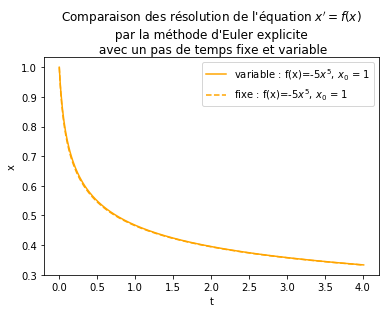

In [28]:
f = lambda x : -x
g = lambda x : -5*x**5

t, x = solve_ivp_euler_explicit_variable_step(g, 0, 1, 4) 
plt.plot(t, x.T, label = 'variable : f(x)=-$5x^5$, $x_0$ = 1', color = 'orange')
t, x = solve_euler_explicit(g, 1, 0.01, 4) 
plt.plot(t, x, '--', color = 'orange', label = 'fixe : f(x)=-$5x^5$, $x_0$ = 1')

plt.title("Comparaison des résolution de l'équation $x' = f(x)$ \n par la méthode d'Euler explicite \n avec un pas de temps fixe et variable")
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.show()

Sur cette fonction, le décalage entre les deux pas de temps n'est pas flagrante mais existe.